In [12]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('kaggle_survey_2017_2021.csv', low_memory=False)


In [2]:
df.shape


(106302, 293)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106302 entries, 0 to 106301
Columns: 293 entries, - to Q38_B_OTHER
dtypes: object(293)
memory usage: 237.6+ MB


In [4]:
df.duplicated().sum()


np.int64(4456)

In [5]:
df = df.drop_duplicates()


In [6]:
df.describe(include='all').T


,count,unique,top,freq
-,101846,6,2021,25973
Time from Start to Finish (seconds),89545,11716,498,107
Q1,101490,12,25-29,22420
Q2,101784,10,Male,45220
Q3,101765,78,India,23936
...,...,...,...,...
Q38_B_Part_6,1287,2,Guild.ai,1286
Q38_B_Part_7,1218,2,Polyaxon,1217
Q38_B_Part_9,1186,2,Domino Model Monitor,1185
Q38_B_Part_11,1,1,"In the next 2 years, do you hope to become mor...",1


In [9]:
df_cleaned = df.dropna(thresh=0.6*len(df), axis=1) 
df_cleaned = df_cleaned.dropna(subset=["Q1"])

In [10]:
df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_4832\2428897060.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned = df_cleaned.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [12]:
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].map(lambda x: x.strip() if isinstance(x, str) else x)


In [13]:
df.head()

,-,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_9,Q38_B_Part_11,Q38_B_OTHER
0,Year,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,2021,910,50-54,Man,India,Bachelorâ€™s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,784,50-54,Man,Indonesia,Masterâ€™s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,924,22-24,Man,Pakistan,Masterâ€™s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN
4,2021,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Example: Encoding Gender
df_cleaned['Q2_encoded'] = df_cleaned['Q2'].map({
    'Man': 0, 
    'Woman': 1, 
    'Nonbinary': 2, 
    'Prefer not to say': 3,
    'Prefer to self-describe': 4
})


<Axes: title={'center': 'Gender Distribution'}, xlabel='Q2'>

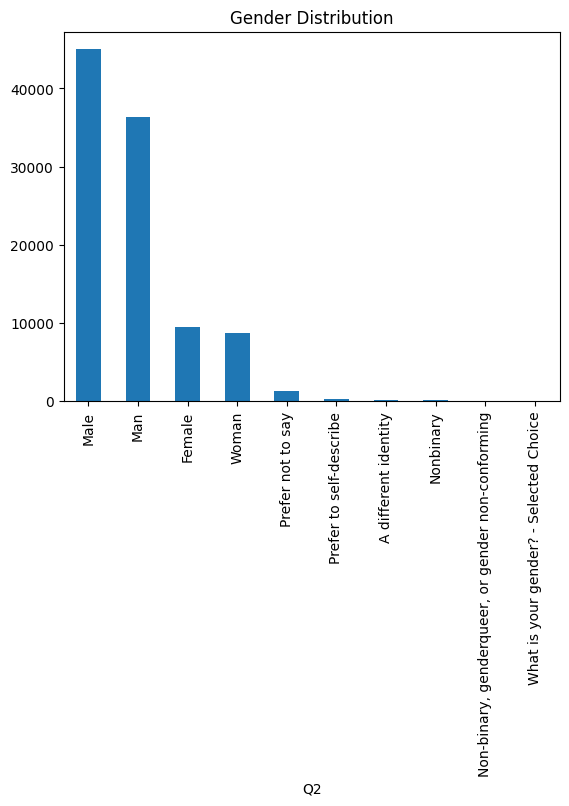

In [21]:
df_cleaned['Q2'].value_counts().plot(kind='bar', title='Gender Distribution')


In [24]:
df.columns[:30]  # first 10 columns


Index(['-', 'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4',
       'Q5', 'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
       'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8', 'Q7_Part_9',
       'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER', 'Q8', 'Q9_Part_1',
       'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7',
       'Q9_Part_8', 'Q9_Part_9'],
      dtype='object')

In [28]:
for col in df.columns:
    if 'Q7' in col:
        print(repr(col))


'Q7_Part_1'
'Q7_Part_2'
'Q7_Part_3'
'Q7_Part_4'
'Q7_Part_5'
'Q7_Part_6'
'Q7_Part_7'
'Q7_Part_8'
'Q7_Part_9'
'Q7_Part_10'
'Q7_Part_11'
'Q7_Part_12'
'Q7_OTHER'


In [4]:
language_cols = [
    'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
    'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8',
    'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12',
    'Q7_OTHER'
]


In [5]:
# Step 1: Copy original dataframe
df_cleaned = df.copy()

# Step 2: Clean whitespace from string values in each column individually
for col in language_cols:
    df_cleaned[col] = df_cleaned[col].map(lambda x: x.strip() if isinstance(x, str) else x)

# Step 3: Get all unique languages across these columns
all_languages = pd.unique(df_cleaned[language_cols].values.ravel())
all_languages = [lang for lang in all_languages if pd.notnull(lang)]

# Step 4: Encode each language as binary column
for lang in all_languages:
    df_cleaned[lang] = df_cleaned[language_cols].apply(
        lambda row: int(lang in row.values), axis=1
    )


<Axes: title={'center': 'Most Popular Programming Languages'}>

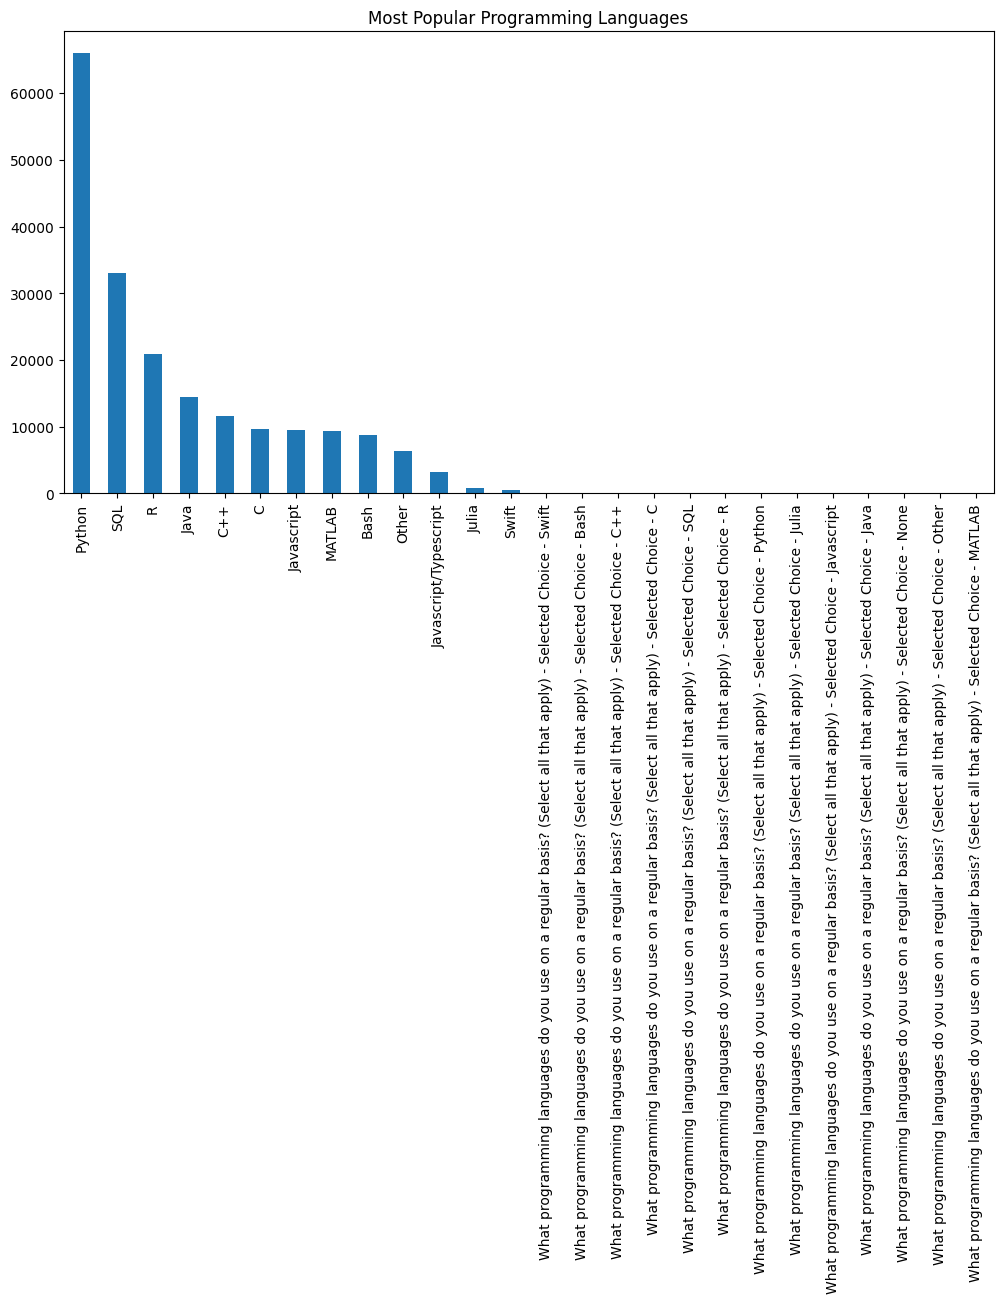

In [6]:
language_usage = df_cleaned[all_languages].sum().sort_values(ascending=False)
language_usage.plot(kind='bar', figsize=(12, 6), title='Most Popular Programming Languages')


<Axes: title={'center': 'Languages Used by Data Scientists'}>

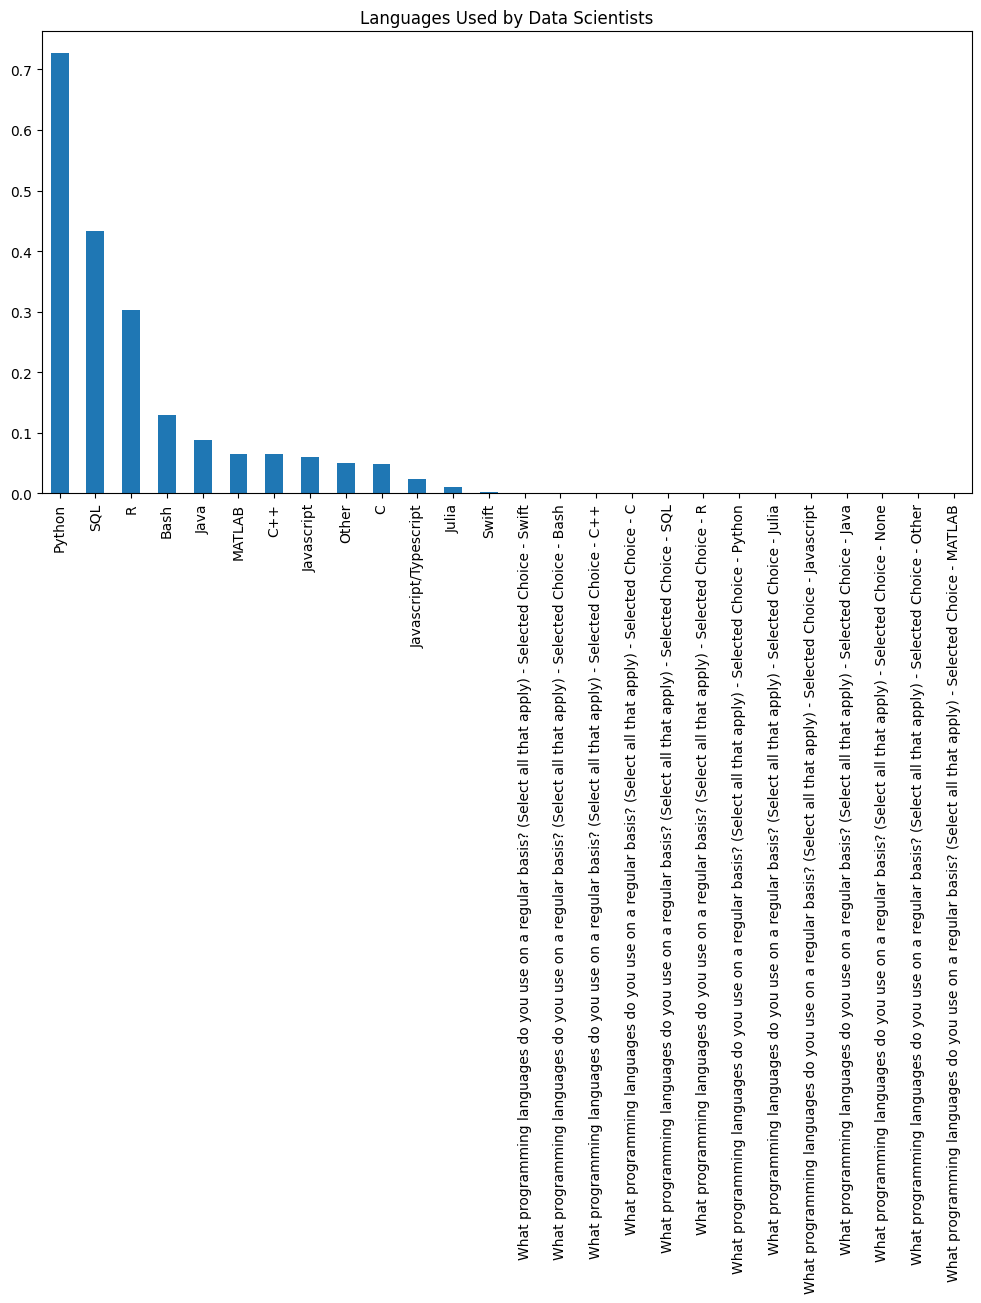

In [7]:
# Example: Which language is used most by Data Scientists?
df_cleaned[df_cleaned['Q5'] == 'Data Scientist'][all_languages].mean().sort_values(ascending=False).plot(
    kind='bar', title='Languages Used by Data Scientists', figsize=(12, 6)
)


<Axes: title={'center': 'Languages Known per Respondent'}, ylabel='Frequency'>

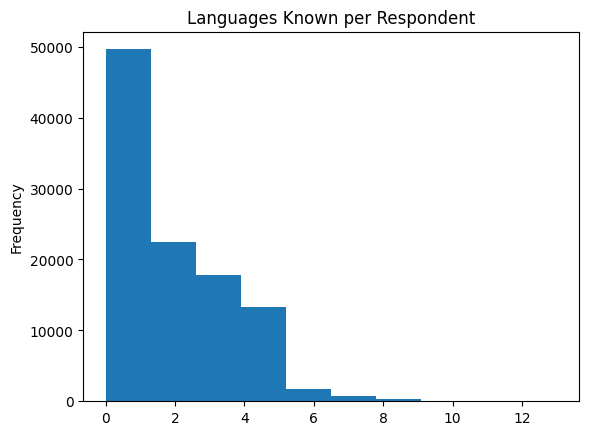

In [8]:
df_cleaned['num_languages'] = df_cleaned[all_languages].sum(axis=1)
df_cleaned['num_languages'].plot.hist(bins=10, title='Languages Known per Respondent')


<Axes: title={'center': 'Language Usage by Experience Level'}>

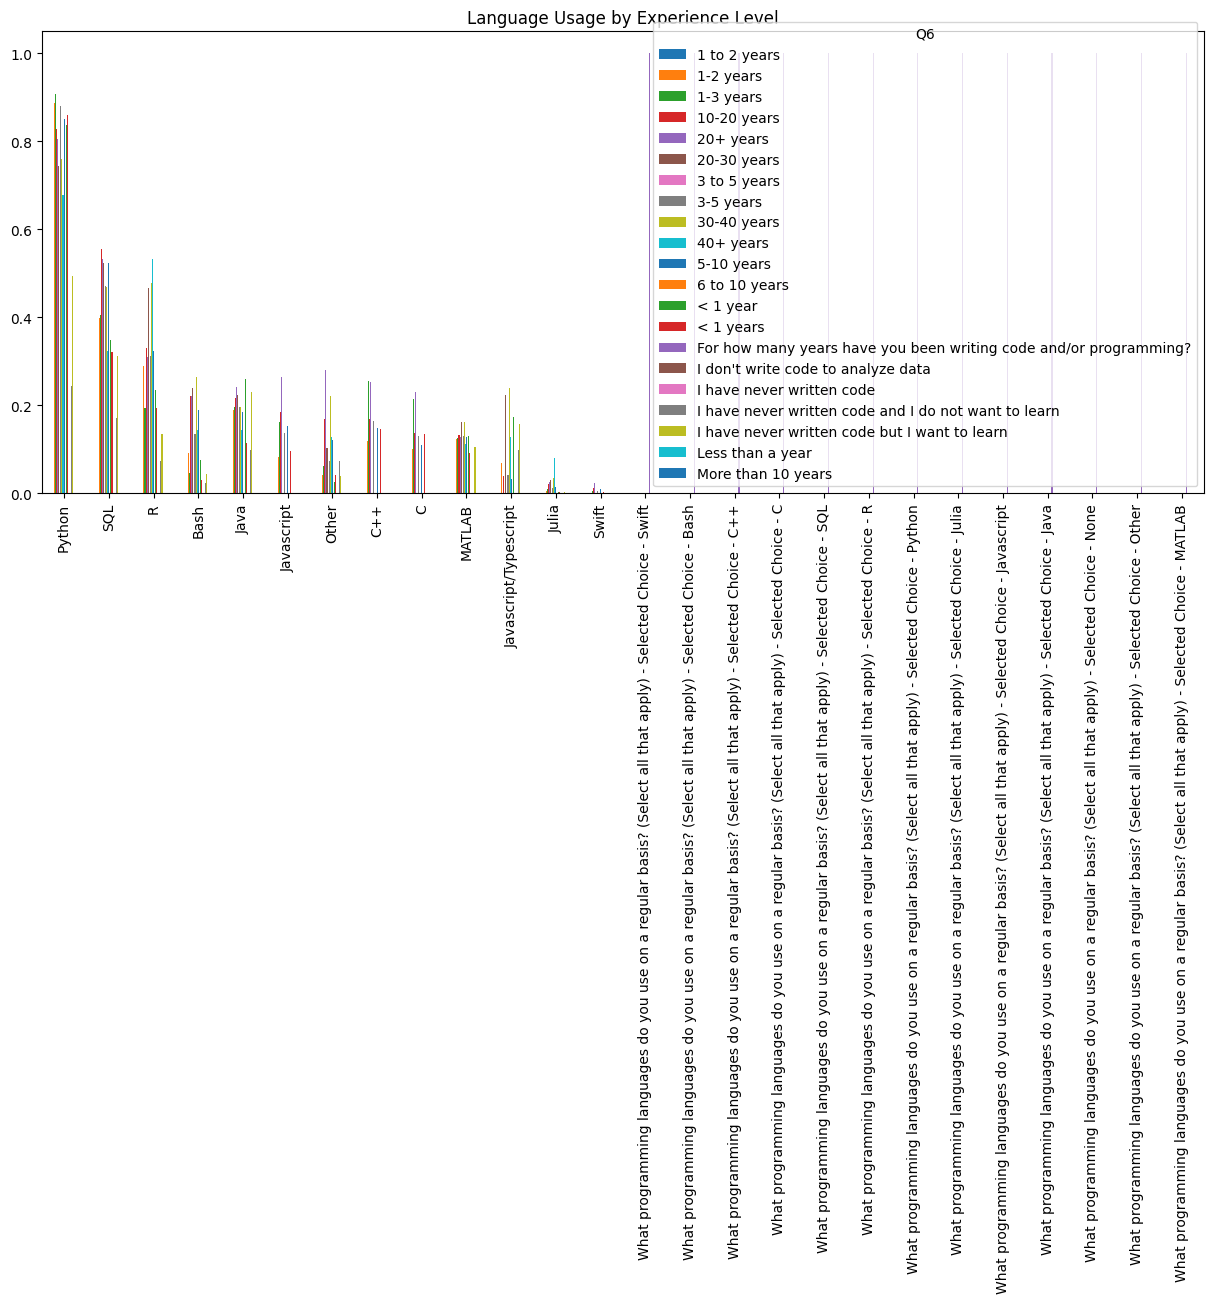

In [9]:
df_cleaned.groupby('Q6')[all_languages].mean().T.sort_values(by='10-20 years', ascending=False).plot(
    kind='bar', figsize=(15, 6), title='Language Usage by Experience Level'
)


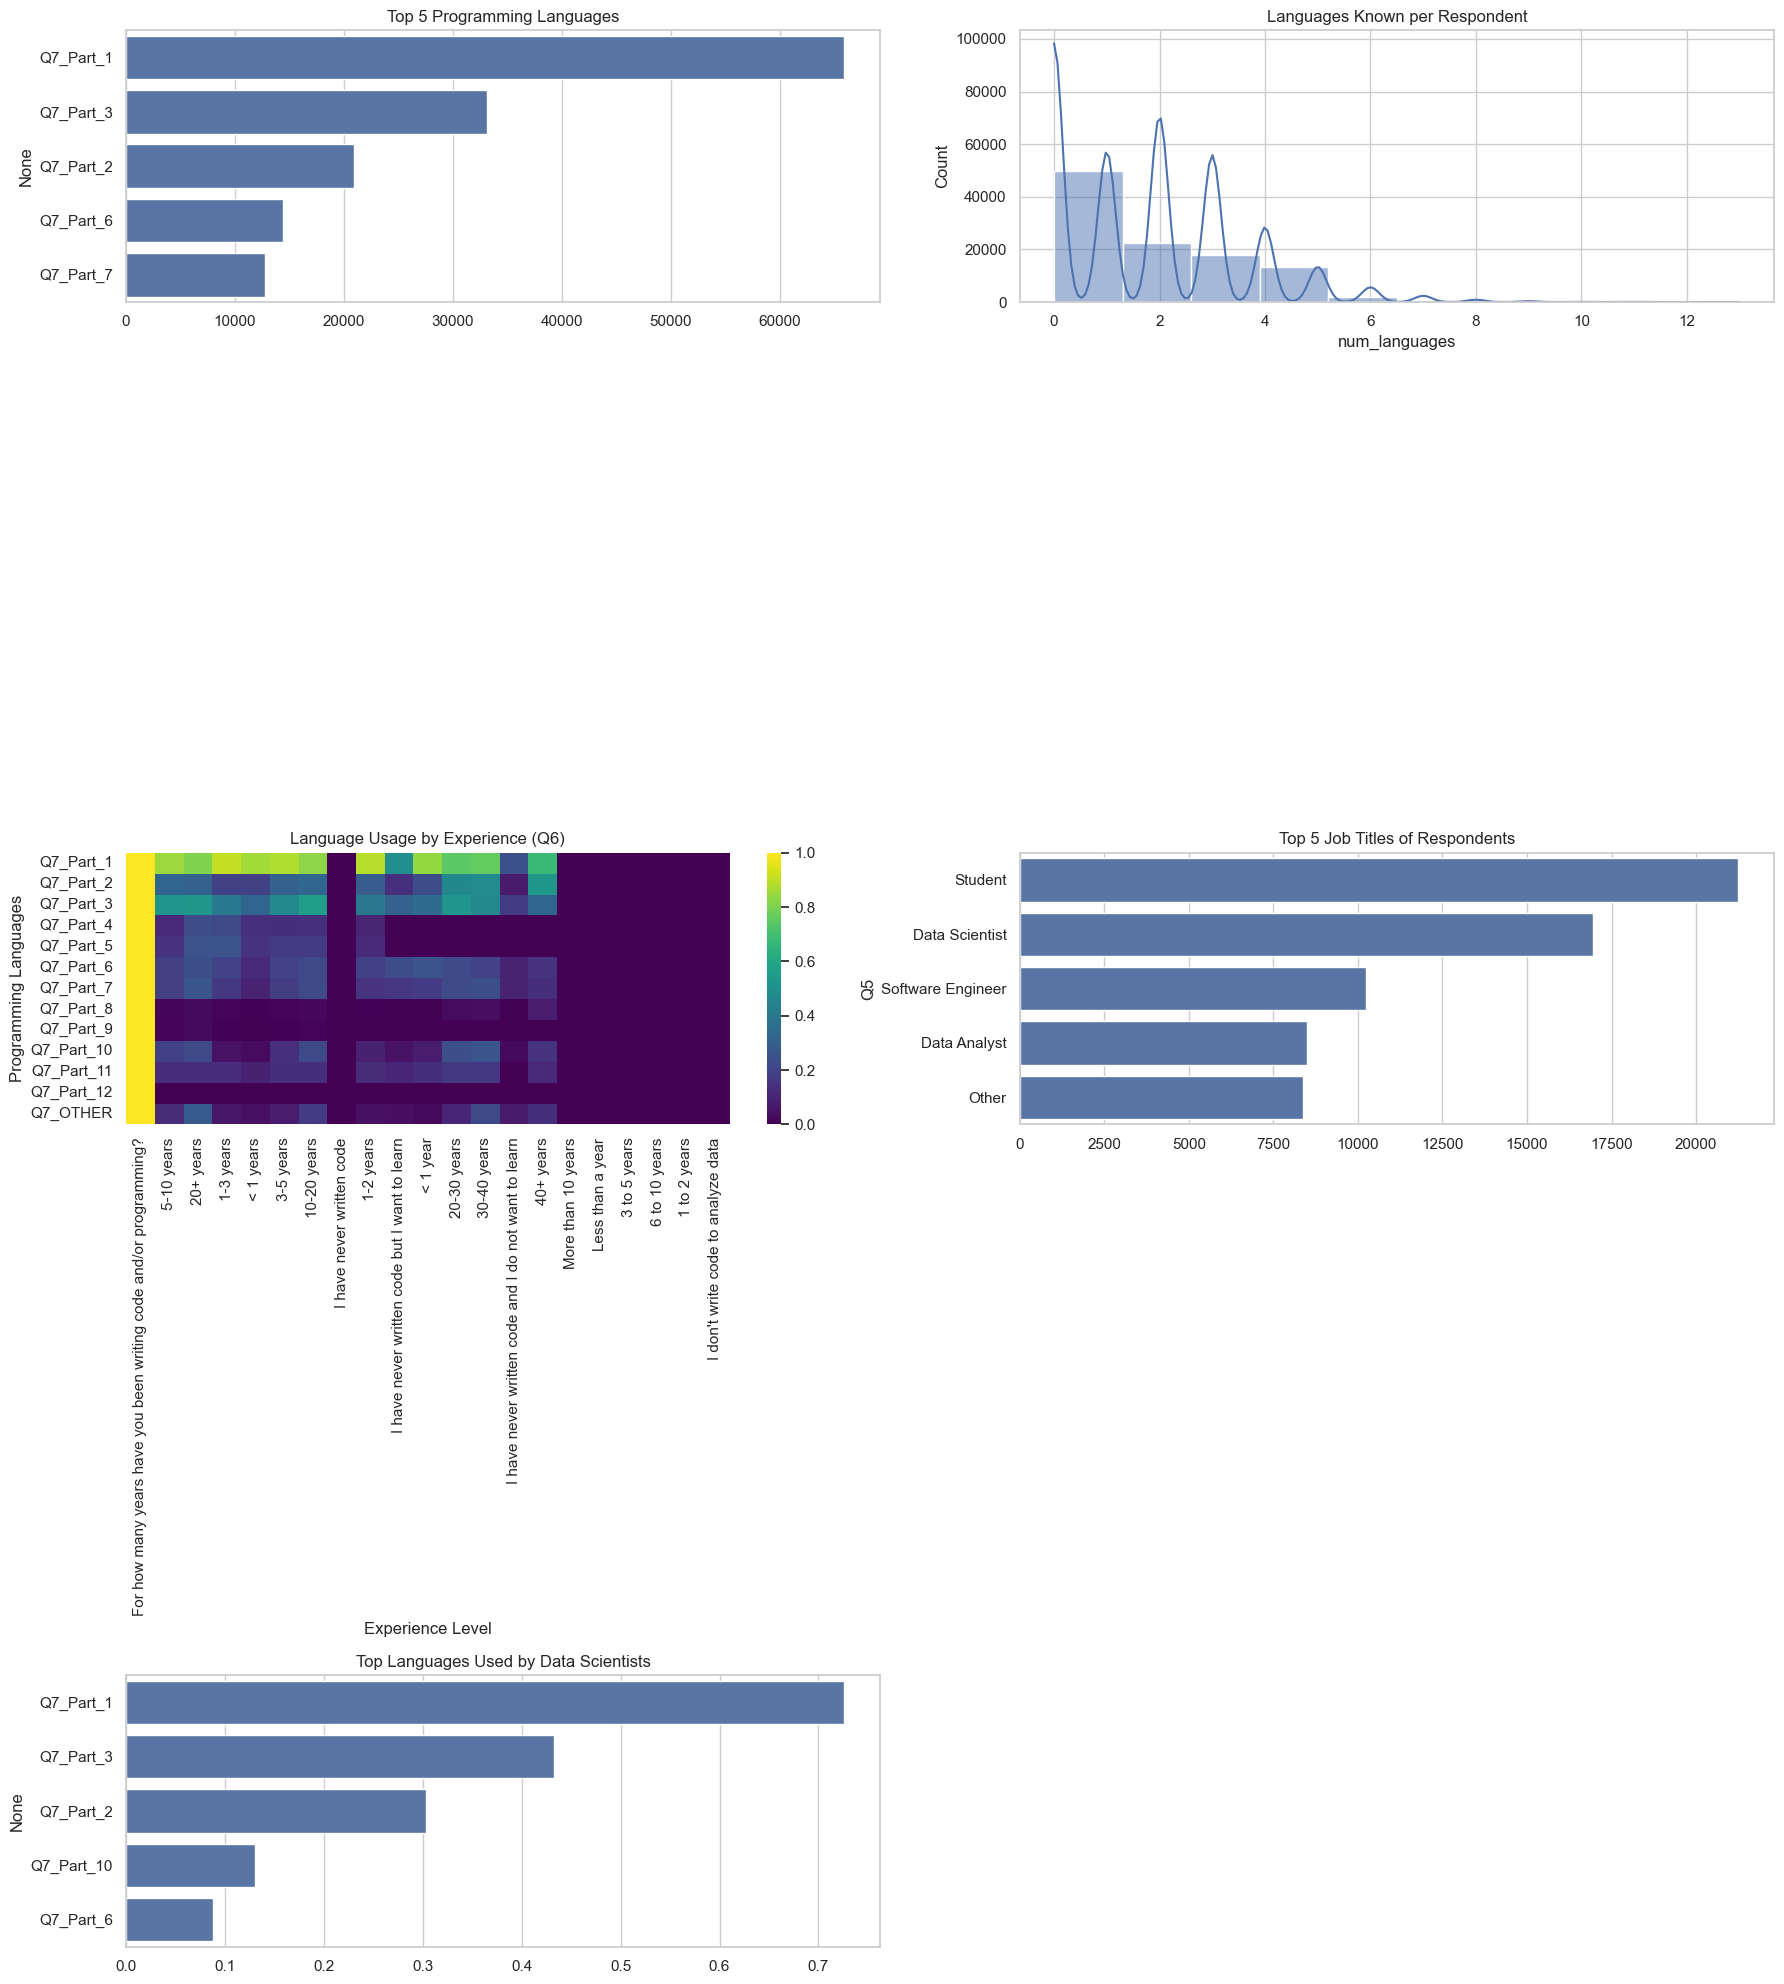

In [15]:
# Required imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the language columns
language_cols = ['Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4',
                 'Q7_Part_5', 'Q7_Part_6', 'Q7_Part_7', 'Q7_Part_8',
                 'Q7_Part_9', 'Q7_Part_10', 'Q7_Part_11', 'Q7_Part_12', 'Q7_OTHER']

# Convert programming language columns to binary (1 if language is mentioned, else 0)
df_cleaned[language_cols] = df_cleaned[language_cols].notna().astype(int)

# Set up for plots
sns.set(style='whitegrid')
plt.figure(figsize=(18, 20))

# Insight 1: Most Popular Programming Languages
plt.subplot(3, 2, 1)
language_usage = df_cleaned[language_cols].sum().sort_values(ascending=False)[:5]
sns.barplot(x=language_usage.values, y=language_usage.index)
plt.title('Top 5 Programming Languages')

# Insight 2: Number of Languages Known Per Respondent
plt.subplot(3, 2, 2)
df_cleaned['num_languages'] = df_cleaned[language_cols].sum(axis=1)
sns.histplot(df_cleaned['num_languages'], bins=10, kde=True)
plt.title('Languages Known per Respondent')

# Insight 3: Language Usage by Experience Level (Q6)
if 'Q6' in df_cleaned.columns:
    plt.subplot(3, 2, 3)
    experience_order = df_cleaned['Q6'].dropna().unique()
    experience_language = df_cleaned.groupby('Q6')[language_cols].mean()
    experience_language = experience_language.loc[experience_order]
    sns.heatmap(experience_language.T, cmap='viridis', cbar=True)
    plt.title('Language Usage by Experience (Q6)')
    plt.xlabel('Experience Level')
    plt.ylabel('Programming Languages')

# Insight 4: Top Job Titles (Q5)
if 'Q5' in df_cleaned.columns:
    plt.subplot(3, 2, 4)
    job_counts = df_cleaned['Q5'].value_counts().head(5)
    sns.barplot(x=job_counts.values, y=job_counts.index)
    plt.title('Top 5 Job Titles of Respondents')

# Insight 5: Language Usage by Data Scientists (Q5)
if 'Q5' in df_cleaned.columns:
    plt.subplot(3, 2, 5)
    ds_usage = df_cleaned[df_cleaned['Q5'] == 'Data Scientist'][language_cols].mean().sort_values(ascending=False)[:5]
    sns.barplot(x=ds_usage.values, y=ds_usage.index)
    plt.title('Top Languages Used by Data Scientists')

plt.tight_layout()
plt.show()
